<figure>
   <img src=" th-4.jpeg"  style="width:700px;height:450px;" >
</figure>

In [1]:
# First, we'll import pandas, numpy a data processing and CSV file I/O library
import pandas as pd
import numpy as np 
# We'll also import seaborn, a Python graphing library
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('hotel_reviews.xlsx - hotel_reviews.csv',header=0,parse_dates=True)
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [4]:
data.shape

(20491, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.index

RangeIndex(start=0, stop=20491, step=1)

In [8]:
data.nunique()

Review    20491
Rating        5
dtype: int64

In [9]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [10]:
data["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

# 2. Perform Exploratory Data Analysis (EDA)

In [11]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Rating'>

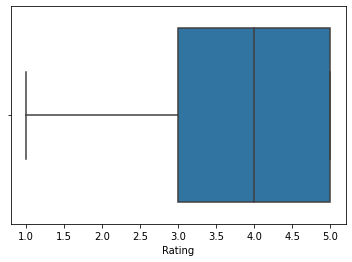

In [12]:
sns.boxplot(x = data['Rating'])

There are no outliers present in the dataset

<AxesSubplot:xlabel='Rating', ylabel='count'>

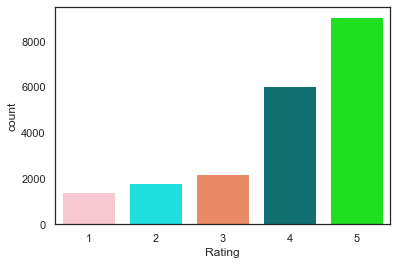

In [13]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = data['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime']) 

In [14]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [15]:
def remove_pun(text):
    for pun in string.punctuation:
        text = text.replace(pun,"")
    text = text.lower()
    return text

In [16]:
data['Word_count']= data['Review'].map(lambda x: len(x.split()))

In [17]:
data.head(10)

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191
5,love monaco staff husband stayed hotel crazy w...,5,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,101
7,"excellent staff, housekeeping quality hotel ch...",4,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,59
9,excellent stayed hotel monaco past w/e delight...,5,35


In [18]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [19]:
data['Rating'] = data['Rating'].apply(rating)
data

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,87
1,ok nothing special charge diamond member hilto...,Negative,250
2,nice rooms not 4* experience hotel monaco seat...,Neutral,217
3,"unique, great stay, wonderful time hotel monac...",Positive,89
4,"great stay great stay, went seahawk game aweso...",Positive,191
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Positive,109
20487,great location price view hotel great quick pl...,Positive,39
20488,"ok just looks nice modern outside, desk staff ...",Negative,63
20489,hotel theft ruined vacation hotel opened sept ...,Negative,781


<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

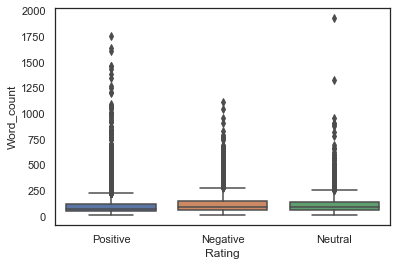

In [20]:
sns.boxplot(x = 'Rating', y='Word_count', data=data)

<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

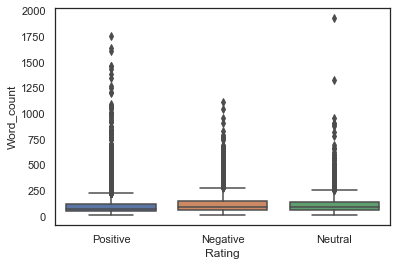

In [21]:
sns.boxplot(x = 'Rating', y='Word_count', data=data)

<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

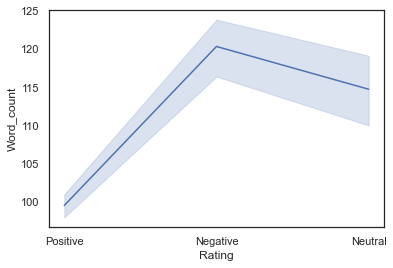

In [22]:
sns.lineplot(x='Rating', y='Word_count', data=data)

Hence, The review Rated as 3 has the highest number of word counts then others

# 3. Sentiment Analysis

In [23]:
from textblob import TextBlob #import the textblob library

In [24]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [25]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [26]:
data['polarity']= data['Review'].apply(polarity)
data['Subjectivity']= data['Review'].apply(subjectivity)

In [27]:
data.head(10)

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,Positive,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,Negative,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,Neutral,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",Positive,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",Positive,191,0.384615,0.629396
5,love monaco staff husband stayed hotel crazy w...,Positive,134,0.243056,0.614583
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,101,0.366661,0.631890
7,"excellent staff, housekeeping quality hotel ch...",Positive,85,0.562963,0.788889
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,59,0.312946,0.576786
9,excellent stayed hotel monaco past w/e delight...,Positive,35,0.286355,0.534066


<AxesSubplot:xlabel='polarity', ylabel='Density'>

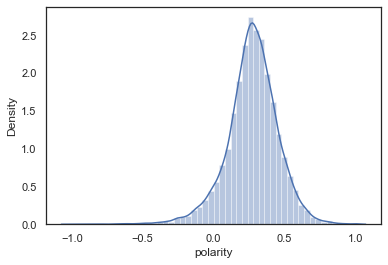

In [28]:
sns.distplot(data['polarity'])

<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

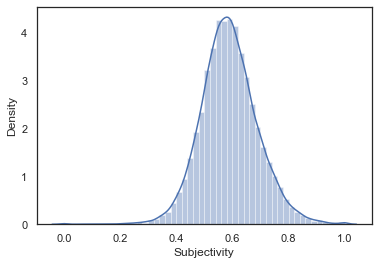

In [29]:
sns.distplot(data['Subjectivity'])

<AxesSubplot:xlabel='Rating', ylabel='polarity'>

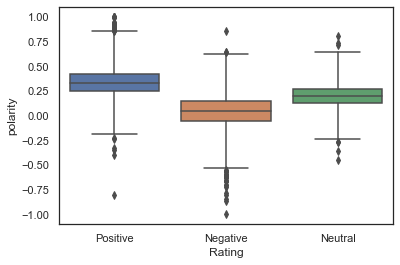

In [30]:
sns.boxplot(x='Rating',y='polarity', data=data, whis=2.5, fliersize= 5)

<AxesSubplot:xlabel='Rating', ylabel='Subjectivity'>

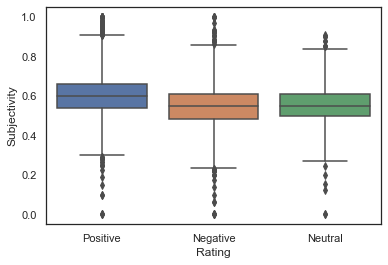

In [31]:
sns.boxplot(x='Rating',y='Subjectivity', data=data, whis=2)

# 4.Text Cleaning(Pre-processing of data)

## 4.1 Remove StopWords

In [32]:
#import libraries stopwords from nltk
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

In [33]:
data['Review'] = data['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [34]:
data.head(10)

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,Positive,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,Negative,250,0.214923,0.495009
2,nice rooms 4* experience hotel monaco seattle ...,Neutral,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",Positive,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",Positive,191,0.384615,0.629396
5,love monaco staff husband stayed hotel crazy w...,Positive,134,0.243056,0.614583
6,"cozy stay rainy city, husband spent 7 nights m...",Positive,101,0.366661,0.631890
7,"excellent staff, housekeeping quality hotel ch...",Positive,85,0.562963,0.788889
8,"hotel stayed hotel monaco cruise, rooms genero...",Positive,59,0.312946,0.576786
9,excellent stayed hotel monaco past w/e delight...,Positive,35,0.286355,0.534066


## 4.2 Stemming

In [35]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [36]:
# Split the sentences to lists of words.
data['Review_stemming'] = data['Review'].str.split()
# Make sure we see the full column.
pd.set_option('display.max_colwidth', -1)
data['Review_stemming'] = data['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [37]:
data.head()

,Review,Rating,Word_count,polarity,Subjectivity,Review_stemming
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",Positive,87,0.208744,0.687000,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",Negative,250,0.214923,0.495009,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, ect, desk, clerk, told, oh, mix, suit, descript, kimpton, websit, sorri, free, breakfast,, got, kidding,, embassi, suit, sit, room, bathroom, bedroom, unlik, kimpton, call, suite,, 5, day, stay, offer, correct, fals, advertising,, send, kimpton, prefer, guest, websit, email, ask, failur, provid, suit, advertis, websit, reserv, descript, furnish, hard, copi, reserv, printout, websit, desk, manag, duti, repli, solution,, send, email, trip, guest, survey, follow, ...]"
2,"nice rooms 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, n't provide guidance special requests.tv hard 

## 4.3 Lemmatization

In [38]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
data['Review_lemmatize'] = data.Review.apply(lemmatize_text)

In [39]:
data.head()

,Review,Rating,Word_count,polarity,Subjectivity,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",Positive,87,0.208744,0.687000,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]","[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, review, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway,, maybe, noisy, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, pay, 40, parking, night,]"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",Negative,250,0.214923,0.495009,"[ok, noth, special, charg, diamond, member, hilton, decid, chain, shot, 20th, anniversari, seattle,, start, book, suit, paid, extra, websit, descript, not,, suit, bedroom, bathroom, standard, hotel, room,, took, print, reserv, desk, show, said, thing, like, tv, couch, ect, desk, clerk, told, oh, mix, suit, descript, kimpton, websit, sorri, free, breakfast,, got, kidding,, embassi, suit, sit, room, bathroom

In [40]:
import re
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [41]:
make_sentences(data,'Review_stemming')
make_sentences(data,'Review_lemmatize')

In [42]:
data.head()

,Review,Rating,Word_count,polarity,Subjectivity,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",Positive,87,0.208744,0.687000,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",Negative,250,0.214923,0.495009,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printout websit desk man

## 4.4 Word Cloud

In [43]:
rev_stemming = " ".join([review for review in data['Review_stemming']])
rev_stemming[:2000]

'nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,  ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit 

In [44]:
rev_lmtz = " ".join([review for review in data['Review_lemmatize']])
rev_lmtz[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,  ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast, got kidding, embassy suit sitting room bathroom bedroom unlike kimpton call suite, 5 day stay offer

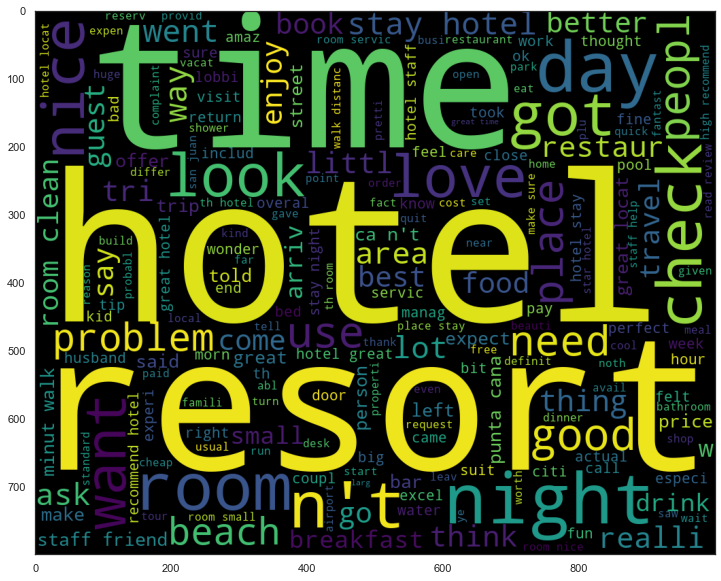

In [45]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

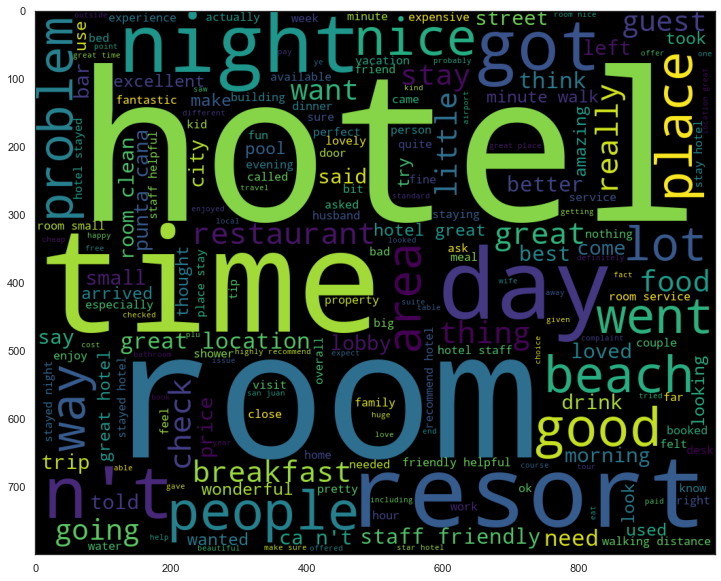

In [46]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

# 5.Creating our model

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [48]:
X = data['Review']
Y = data['Rating']

In [49]:
data['Rating']

0        Positive
1        Negative
2        Neutral 
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Negative
20489    Negative
20490    Negative
Name: Rating, Length: 20491, dtype: object

In [50]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [51]:
X_train

11710    outstanding cleanliness value location wanted stay central location london luna simone hotels fell search area, checked reviews trip advisor decided book, certainly dissapointed, location ideal, short walk transit important sight seeing locations, absolutely cleanest hotels stayed, breakfast good served management gives chance talk owners, management staff outstanding friendly, assist site seeing plans additional charge fact probably save money, got london bus tour tickets hotel vendor rate, thinking trip uk europe luna simone london hotel staying going london reccomend luna simone,                                                                                                                                                                                                                                                                                                                                                             
10444    cheap cheerful hey sure fuss picked hotel p

In [52]:
X_test

10726    recommend hotel reviewers actually stay hotel did, good thing hotel location really close leidseplein, shared facilities filthy got, look toilet floor cleaned month, facilities cleaned 3 days got, disgusting, staff rude complained left night early refused refund night, recommend hotel,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

# 6. Vectorization(Tfidf)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
df= data.copy()

In [55]:
df

Review  \
0      nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [56]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

## 6.1 Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_tfidf, Y_train)
y_pred_tfidf = lr.predict(X_test_tfidf)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(Y_test,y_pred_tfidf))
print(accuracy_score(Y_test,y_pred_tfidf))
print(classification_report(Y_test,y_pred_tfidf))

[[ 474   35  116]
 [  83   65  284]
 [  25   25 2992]]
0.8614296169797512
              precision    recall  f1-score   support

    Negative       0.81      0.76      0.79       625
     Neutral       0.52      0.15      0.23       432
    Positive       0.88      0.98      0.93      3042

    accuracy                           0.86      4099
   macro avg       0.74      0.63      0.65      4099
weighted avg       0.83      0.86      0.83      4099



## 6.2 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_tfidf,Y_train)
y_pred = clf.predict(X_test_tfidf)

print(confusion_matrix(Y_test,y_pred))  
print(classification_report(Y_test,y_pred))  
print(accuracy_score(Y_test, y_pred))

[[ 300    8  317]
 [  48    8  376]
 [  26    4 3012]]
              precision    recall  f1-score   support

    Negative       0.80      0.48      0.60       625
     Neutral       0.40      0.02      0.04       432
    Positive       0.81      0.99      0.89      3042

    accuracy                           0.81      4099
   macro avg       0.67      0.50      0.51      4099
weighted avg       0.77      0.81      0.76      4099

0.8099536472310319


## 6.3 Naive Bayes

In [60]:
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

In [61]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
y_pred  =  classifier.fit(X_train_tfidf,Y_train).predict(X_test_tfidf)

print(confusion_matrix(Y_test,y_pred))  
print(classification_report(Y_test,y_pred))  
print(accuracy_score(Y_test, y_pred))

[[ 421  152   52]
 [ 130  186  116]
 [ 244  600 2198]]
              precision    recall  f1-score   support

    Negative       0.53      0.67      0.59       625
     Neutral       0.20      0.43      0.27       432
    Positive       0.93      0.72      0.81      3042

    accuracy                           0.68      4099
   macro avg       0.55      0.61      0.56      4099
weighted avg       0.79      0.68      0.72      4099

0.6843132471334472


## 6.4 MultinomialNB

In [62]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
y_pred  =  classifier.fit(X_train_tfidf,Y_train).predict(X_test_tfidf)

print(confusion_matrix(Y_test,y_pred))  
print(classification_report(Y_test,y_pred))  
print(accuracy_score(Y_test, y_pred))

[[ 404    0  221]
 [  62    0  370]
 [  27    0 3015]]
              precision    recall  f1-score   support

    Negative       0.82      0.65      0.72       625
     Neutral       0.00      0.00      0.00       432
    Positive       0.84      0.99      0.91      3042

    accuracy                           0.83      4099
   macro avg       0.55      0.55      0.54      4099
weighted avg       0.75      0.83      0.78      4099

0.8341058794828007


## 6.5 LinearSVC

In [63]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
y_pred_svc  =  classifier.fit(X_train_tfidf,Y_train).predict(X_test_tfidf)

print(confusion_matrix(Y_test,y_pred_svc))  
print(classification_report(Y_test,y_pred_svc))  
print(accuracy_score(Y_test, y_pred_svc))

[[ 490   50   85]
 [  98   96  238]
 [  35   61 2946]]
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79       625
     Neutral       0.46      0.22      0.30       432
    Positive       0.90      0.97      0.93      3042

    accuracy                           0.86      4099
   macro avg       0.72      0.66      0.67      4099
weighted avg       0.84      0.86      0.84      4099

0.8616735789216882


# 7. Bag of words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bag= vectorizer.fit_transform(X_train.values)
X_test_bag= vectorizer.transform(X_test.values)

## 7.1 Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_bag, Y_train)
y_pred_bag = lr.predict(X_test_bag)

In [66]:
print(confusion_matrix(Y_test,y_pred_bag))
print(accuracy_score(Y_test,y_pred_bag))
print(classification_report(Y_test,y_pred_bag))

[[ 451   94   80]
 [  97  140  195]
 [  55  143 2844]]
0.8380092705537936
              precision    recall  f1-score   support

    Negative       0.75      0.72      0.73       625
     Neutral       0.37      0.32      0.35       432
    Positive       0.91      0.93      0.92      3042

    accuracy                           0.84      4099
   macro avg       0.68      0.66      0.67      4099
weighted avg       0.83      0.84      0.83      4099



## 7.2 Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_bag,Y_train)
y_pred = clf.predict(X_test_bag)

print(confusion_matrix(Y_test,y_pred))  
print(classification_report(Y_test,y_pred))  
print(accuracy_score(Y_test, y_pred))

[[ 226    4  395]
 [  24    2  406]
 [  26    0 3016]]
              precision    recall  f1-score   support

    Negative       0.82      0.36      0.50       625
     Neutral       0.33      0.00      0.01       432
    Positive       0.79      0.99      0.88      3042

    accuracy                           0.79      4099
   macro avg       0.65      0.45      0.46      4099
weighted avg       0.75      0.79      0.73      4099

0.7914125396438155


## 7.3 MultinomialNb

In [68]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_bag,Y_train)
y_pred = clf.predict(X_test_bag)

print(confusion_matrix(Y_test,y_pred))  
print(classification_report(Y_test,y_pred))  
print(accuracy_score(Y_test, y_pred))

[[ 462   22  141]
 [  76   21  335]
 [  57    7 2978]]
              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       625
     Neutral       0.42      0.05      0.09       432
    Positive       0.86      0.98      0.92      3042

    accuracy                           0.84      4099
   macro avg       0.69      0.59      0.59      4099
weighted avg       0.80      0.84      0.81      4099

0.8443522810441572


Hence, After the prediction from diffrent type of algorithm, i concluded that the Logistic regression gives maximum accuracy with both 'Bag of words' and 'tfidf'. Still if we compare both of them we found that 'Bag of words' slightly more accurate then 'tfidf'.

In [69]:
from sklearn import feature_extraction

In [70]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range = (1,2), analyzer = 'char')

In [71]:
from sklearn import pipeline

In [72]:
from sklearn.svm import LinearSVC

In [74]:
from sklearn import linear_model

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn import linear_model
model_pipe = pipeline.Pipeline([('vec',vec),('clf',linear_model.LogisticRegression())])

In [80]:
model_pipe

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [81]:
model_pipe.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [82]:
model_pipe.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [83]:
pred1 = model_pipe.predict(X_test)
pred1

array(['Positive', 'Positive', 'Neutral', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [84]:
from sklearn import metrics

In [85]:
metrics.accuracy_score(Y_test,pred1)*100

80.77579897535985

In [86]:
metrics.confusion_matrix(Y_test,pred1)

array([[ 303,    3,  319],
       [  56,    7,  369],
       [  38,    3, 3001]])

In [87]:
model_pipe.predict(['bad hotel'])

array(['Negative'], dtype=object)

In [88]:
model_pipe.predict(['nice rooms 4* experience hotel monaco seattle'])

array(['Positive'], dtype=object)

In [89]:
model_pipe.predict(['ok nothing special charge diamond member hilto'])

array(['Negative'], dtype=object)

In [90]:
import pickle

In [91]:
new_file = open('model_pipe.pkl','wb')
pickle.dump(model_pipe,new_file)
new_file.close()

## Deployment

In [92]:
# Importing the libraries
import streamlit as st
import pickle
import spacy
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer


# Body of the application
st.header("Hotel Review Prediction Application.")
st.markdown("This application is trained on machine learning model.\n "
            "This application can predict if the given **review**"
            " is **Positive, Negative or Neutral**")


text = st.text_input("Type your review here...", """""")


# Working on prediction
# Loading trained model
loaded_model = pickle.load(
    open("model_pipe.pkl", "rb"))


# Preprocessing the text
nlp = spacy.load("en_core_web_sm")

def preprocessing(text):
    """Takes the text input and removes the stop words and punctuations from the text and gives processed text output.
    """
    global nlp
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


preprocessed_input = [preprocessing(text)]
st.write(preprocessed_input)

# Tfidf


# Making prediction
if st.button("Click to make prediction"):

    # Making prediction for model input
    prediction = loaded_model.predict(preprocessed_input)
    st.write(prediction)

    
       # Returning true prediction
    if prediction == 0:
        st.write("Input review has Negative Sentiment.:sad:🙁")
    elif prediction == 2:
        st.write("Input review has Positive Sentiment.:smile:😀")
    else:
        st.write("Input review has Neutral Sentiment.😐")
    else:
        pass

2022-11-26 10:50:10.221 
  command:

    streamlit run /Users/tech/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
